In [2]:
!python -m pip install numpy Pillow opencv-python

In [1]:
from PIL import Image
import numpy as np
import cv2
import IPython

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

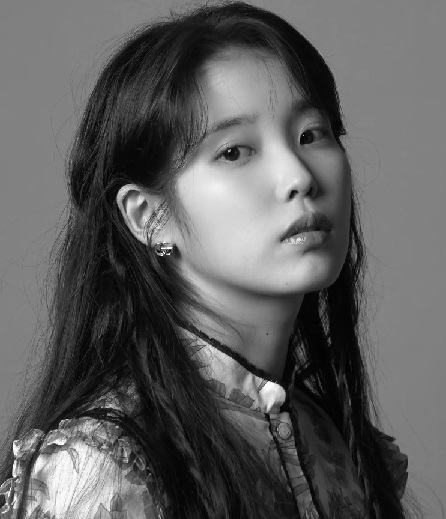

In [2]:
img = Image.open('./samples/IU.jpg')
imggray = img.convert('LA')

display(imggray)

In [3]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
U, sigma, V = np.linalg.svd(imgmat)

print(U.shape, sigma.shape, V.shape)

(519, 519) (446,) (446, 446)


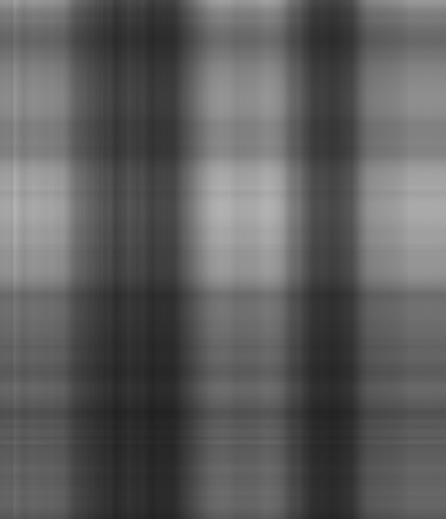

In [7]:
def show_recon_image(x):
    recon = np.matrix(U[:, :x]) * np.diag(sigma[:x]) * np.matrix(V[:x, :])
    imshow(recon)

show_recon_image(1) # 가장 중요한 정보 순으로 Sigma 1행만 사용했을 시.

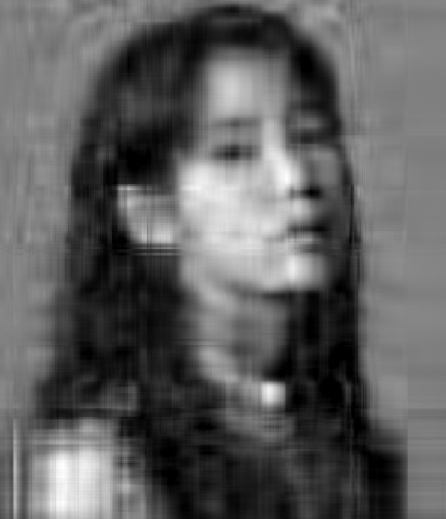

In [8]:
show_recon_image(10) # 가장 중요한 정보 순으로 Sigma 1~10행만 사용했을 시.

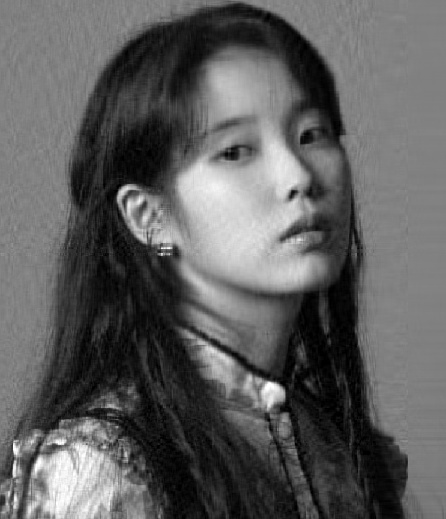

In [9]:
show_recon_image(50) # 가장 중요한 정보 순으로 Sigma 1~50행만 사용했을 시.

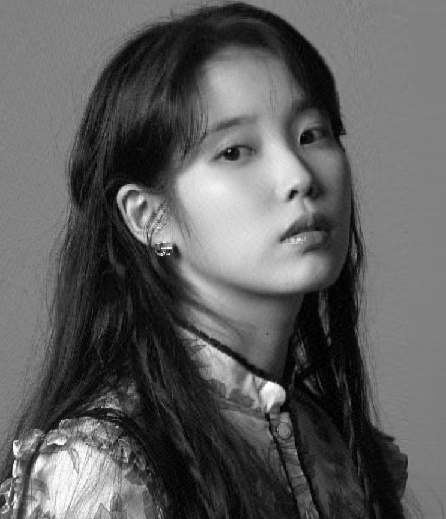

In [10]:
show_recon_image(100) # 가장 중요한 정보 순으로 Sigma 1~100행만 사용했을 시.